# Creation of simulated dataset of climate variables, based on Phoenix Park, Dublin weather station #   
As explained in the README file for this repository, this notebook aims to generate simulated data, based on analysis of government provided actual readings, for rainfall, atmospheric pressure, and minimum and maximum temperatures on a daily basis from the Phoenix Park weather station.  

Climate predictions are of highly significant importance, with many concerns about human induced global warming. This Notebook generates one year's worth of simulated data for the specified variables, for the year following the current year. 

The actual historical data were downloaded from the government website [1] into an Excel spreadsheet, and then exported to a csv file. The non-data header rows, plus columns for variables that are not being examined have been removed from the file, along with incomplete rows of data.  

The pandas, matplotlib and scipy packages are imported for processing the input data, and numpy is used to generate random, simulated data.  

Refrences are provided at the end of this Notebook.  

The csv file is first loaded into a Pandas dataframe, and we get the data type for each column :  
[2],[3]


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from numpy.polynomial.polynomial import polyfit
# Get the csv file generated from the Excel spreadsheet that was downloaded from the website
df = pd.read_csv('Phoenix Park weather data.csv')
# Display the columns
print (df.dtypes)

date      object
maxtp    float64
mintp    float64
rain     float64
cbl      float64
dtype: object


'cbl' is the 'convective boundary layer' - the layer of the earth's atmosphere most affected by the heating effect of the sun on the earth's surface. The 'cbl' column here, which is for a ground based weather station, is the atmospheric pressure at ground level [4].  

Display the first few rows from the spreadsheet and count the number of rows [5], [6]:  

In [88]:
print(df.iloc[0:12],0)
print(' ')
print('Number of rows ' , len(df.index))

         date  maxtp  mintp  rain     cbl
0   01-Jan-06    8.2    2.9   0.0  1002.8
1   02-Jan-06   10.6    0.7   0.0  1016.5
2   03-Jan-06   10.9    0.0   0.2  1020.5
3   04-Jan-06    7.2   -1.6   0.0  1022.5
4   05-Jan-06    6.4    4.1   0.0  1014.6
5   06-Jan-06    5.1    1.1   0.0  1015.6
6   07-Jan-06    4.7    1.7   0.0  1017.9
7   08-Jan-06    5.9   -2.7   1.3  1019.2
8   09-Jan-06   10.5   -4.2   0.0  1014.5
9   10-Jan-06   12.9    8.0   9.6  1002.3
10  11-Jan-06    9.0    4.1   0.3  1007.6
11  12-Jan-06   12.5    4.6   0.0  1011.6 0
 
Number of rows  4742


There are many data rows, so make sure programatically that none of them contain null values - as this would affect the statistical values such as 'mean' that will be used to create the simulated data [7].  

In [89]:
df1 = df[df.isna().any(axis=1)]
print (df1)

Empty DataFrame
Columns: [date, maxtp, mintp, rain, cbl]
Index: []


There aren't any null values - we've removed them all by getting rid of incomplete rows.

Set up two variables containing the list of years that are in the file obtained from the weather station, in the format '-yy' and 'yyyy'. We'll use these later for displaying output and for calculating a correcting factor based on changes in the mean value of each variable by year.  
Also, find the year that is midway through the period covered by the actual data set. Put into 'midyear'.

In [90]:
y=df['date'].str[7:9].unique()
yearx=[]
years=[]
for i in y:
    yearx.append('-'+i)
    years.append('20'+i)
# Get the middle year of the range of years in the actual data    
midyear=2000+(int(years[(len(years)-1)])-int(years[0]))  

Break down the actual data by month, so we can build up our simulated data on a monthly basis. Extract the data for each month into a separate dataframe, to make it easy to plot and analyse at this scale [8] :

In [91]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mx={}
i=0
for mon in months:
    mx[i]=df[df['date'].str.contains(mon)]
    i+=1

Calculate how many years after 'midyear' (obtained above) is the year that we'll be creating our simulated data for. Put it in 'mfac'. This will be used as a multiplying factor later along with the rate of change of the mean of each variable by year. Also, create a list of dates to add to the simulated data for the year we're creating it for - put in 'odates' [9]. Display 'odates'

In [92]:
import datetime

year=datetime.date.today().year
# Put how many days are in each month - depending on if it's a leap year
if (year+1) % 4 == 0:
   ndays=[31,29,31,30,31,30,31,31,30,31,30,31] 
   numdays=366
else:
   ndays=[31,28,31,30,31,30,31,31,30,31,30,31]  
   numdays=365

# Set up a multiplying factor to use later    
mfac=(year-midyear)+0.5

year = str((year)+1)
yx=year[2:]

# Create a list of dates in the same format as for the original data dd-mmm-yy
odates=[]
ix=0
for n in ndays:
    for i in range(n):
       iy=str((i+1)).zfill(2)
       odates.append(iy+'-'+months[ix]+'-'+yx)
    ix+=1    
print(odates)    
        

['01-Jan-20', '02-Jan-20', '03-Jan-20', '04-Jan-20', '05-Jan-20', '06-Jan-20', '07-Jan-20', '08-Jan-20', '09-Jan-20', '10-Jan-20', '11-Jan-20', '12-Jan-20', '13-Jan-20', '14-Jan-20', '15-Jan-20', '16-Jan-20', '17-Jan-20', '18-Jan-20', '19-Jan-20', '20-Jan-20', '21-Jan-20', '22-Jan-20', '23-Jan-20', '24-Jan-20', '25-Jan-20', '26-Jan-20', '27-Jan-20', '28-Jan-20', '29-Jan-20', '30-Jan-20', '31-Jan-20', '01-Feb-20', '02-Feb-20', '03-Feb-20', '04-Feb-20', '05-Feb-20', '06-Feb-20', '07-Feb-20', '08-Feb-20', '09-Feb-20', '10-Feb-20', '11-Feb-20', '12-Feb-20', '13-Feb-20', '14-Feb-20', '15-Feb-20', '16-Feb-20', '17-Feb-20', '18-Feb-20', '19-Feb-20', '20-Feb-20', '21-Feb-20', '22-Feb-20', '23-Feb-20', '24-Feb-20', '25-Feb-20', '26-Feb-20', '27-Feb-20', '28-Feb-20', '29-Feb-20', '01-Mar-20', '02-Mar-20', '03-Mar-20', '04-Mar-20', '05-Mar-20', '06-Mar-20', '07-Mar-20', '08-Mar-20', '09-Mar-20', '10-Mar-20', '11-Mar-20', '12-Mar-20', '13-Mar-20', '14-Mar-20', '15-Mar-20', '16-Mar-20', '17-Mar-20'

Analysis of Irish climate records by a team at Maynooth university on behalf of the Environmental Protection Agency demonstrate that a Gamma probability distribution may be used to model winter and summer precipitation levels, and a Normal distribution for summer temperatures [10].  

Plot histograms for each month for each of the variables 'Max Temp', 'Min Temp', 'Rain' and 'Cbl' (pressure), to get an idea of what their distributions look like for this dataset. Use tight_layout so the title and axes labels don't overlap [11],[12]. Start with Max Temp (may take a little while to run):   

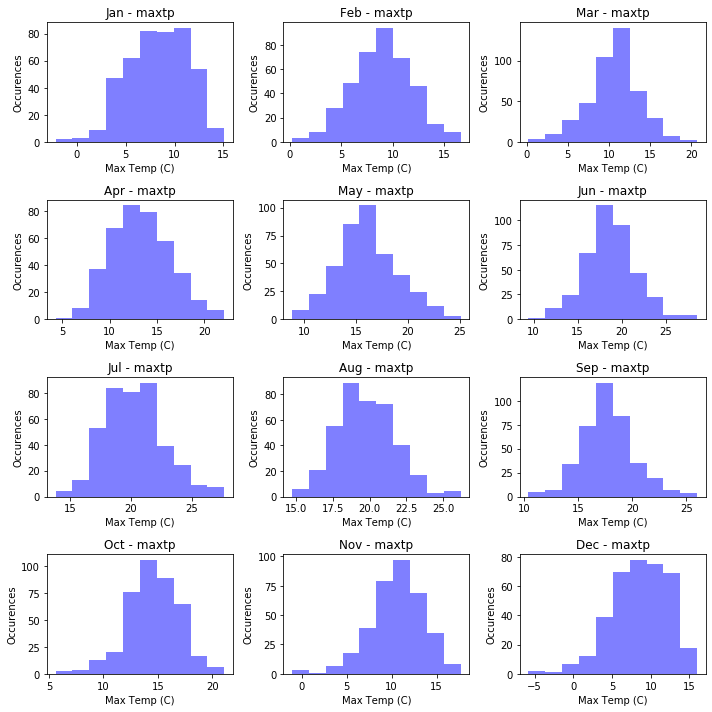

In [93]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['maxtp'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Max Temp (C)')
        ax.set_title(months[i] + " - maxtp")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

It looks like the data for some months has a Normal distribution, but perhaps not for other months, eg December which is skewed to the right. Use a statistical test to check for Normality [13] - the Shapiro-Wilks test. Put which ones are Normal into 'norm', and the others into 'nonnorm'.  

In [94]:
from scipy.stats import shapiro
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['maxtp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'maxtp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'maxtp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'maxtp' - sample does not look Normal
Feb  'maxtp' - sample looks Normal
Mar  'maxtp' - sample does not look Normal
Apr  'maxtp' - sample looks Normal
May  'maxtp' - sample does not look Normal
Jun  'maxtp' - sample looks Normal
Jul  'maxtp' - sample does not look Normal
Aug  'maxtp' - sample does not look Normal
Sep  'maxtp' - sample does not look Normal
Oct  'maxtp' - sample does not look Normal
Nov  'maxtp' - sample does not look Normal
Dec  'maxtp' - sample does not look Normal



The data for many of the months are not Normally distributed. One way to generate random data to simulate actual values is to generate a Kernel Density Estimate (KDE), which estimates the probability density function of the variable, and then to sample data from that estimate [14], [15], [16].
  
Check first how this works for December for Max Temp [17] :  

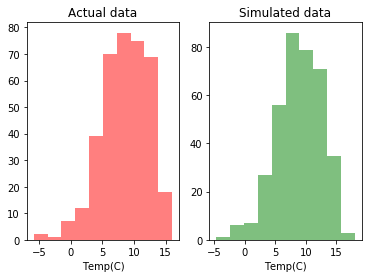

In [95]:
#Create a list that we'll put our simulated data in
sim_maxtp=[0]*12

# Count how many values we have
num=len(mx[11]['maxtp'])

# Define our actual values as being for December 'maxtp' 
actual_values = mx[11]['maxtp']

# Generate a KDE from the actual values
sample_pdf = scipy.stats.gaussian_kde(actual_values)

# Generate a random sample from the KDE
sim_maxtp[11] = sample_pdf.resample(num).T[:,0]

# Plot two histograms side by side
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[11]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[11], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()

This gives us the same basic shape for the data. We'll use this method to generate our simulated data for the rest of the months that are not Normal (Jan, Mar, May, Jul, Aug, Sep, Oct, Nov), and numpy.random for those that are according to the Shapiro-Wilk test above (Feb, Apr and Jun).  
Start with the non-Normal months, using the method above for December:

In [96]:
for i in nonnorm:
   num=len(mx[i]['maxtp'])
   actual_values = mx[i]['maxtp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_maxtp[i] = sample_pdf.resample(num).T[:,0]

Get the mean and standard deviation for Feb, Apr and Jun, so we can generate the random simulated data using numpy.random [18].  

In [97]:
means=[0]*12
stds =[0]*12
for i in norm:
   means[i]=(mx[i]['maxtp'].mean())
   stds[i] =(mx[i]['maxtp'].std())

Generate random values for Feb and check the histograms of actual and generated data:

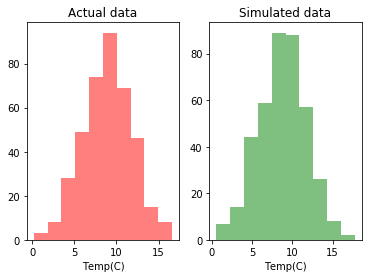

In [98]:
num=len(mx[1]['maxtp'])
sim_maxtp[1]=np.random.normal(means[1],stds[1],num)
fig, ax = plt.subplots(1,2)
ax[0].hist(mx[1]['maxtp'], alpha = 0.5, color = 'r')
ax[0].set_title('Actual data')
ax[0].set_xlabel('Temp(C)')
ax[1].hist(sim_maxtp[1], alpha = 0.5, color = 'g')
ax[1].set_title('Simulated data')
ax[1].set_xlabel('Temp(C)')
plt.show()


The histograms match well, so generate data for the other two months :

In [99]:
num=len(mx[3]['maxtp'])
sim_maxtp[3]=np.random.normal(means[3],stds[3],num)
num=len(mx[5]['maxtp'])
sim_maxtp[5]=np.random.normal(means[5],stds[5],num)

We now have our simulated data for 'maxtp'. Go through the same steps for 'mintp':

In [100]:
# Check for Normal distribution
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['mintp'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'mintp' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'mintp' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'mintp' - sample looks Normal
Feb  'mintp' - sample does not look Normal
Mar  'mintp' - sample looks Normal
Apr  'mintp' - sample looks Normal
May  'mintp' - sample does not look Normal
Jun  'mintp' - sample looks Normal
Jul  'mintp' - sample does not look Normal
Aug  'mintp' - sample looks Normal
Sep  'mintp' - sample does not look Normal
Oct  'mintp' - sample looks Normal
Nov  'mintp' - sample looks Normal
Dec  'mintp' - sample does not look Normal


We see Jan, Mar, Apr, Jun, Aug, Oct and Nov have Normally distributed data, with the remainder being non-Normal. Use the KDE to generate the non-Normal data, and numpy.random for the Normal:

In [101]:
# Non-Normal data generation
sim_mintp=[0]*12
for i in nonnorm:
   num=len(mx[i]['mintp'])
   actual_values = mx[i]['mintp']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_mintp[i] = sample_pdf.resample(num).T[:,0]


In [102]:
# Normal data generation
for i in norm:
   mean=(mx[i]['mintp'].mean())
   std =(mx[i]['mintp'].std())
   num=len(mx[i]['mintp'])
   sim_mintp[i]=np.random.normal(mean,std,num)    

Now take a look at what the 'cbl' (pressure) data is like, using histograms, as for 'maxtp':

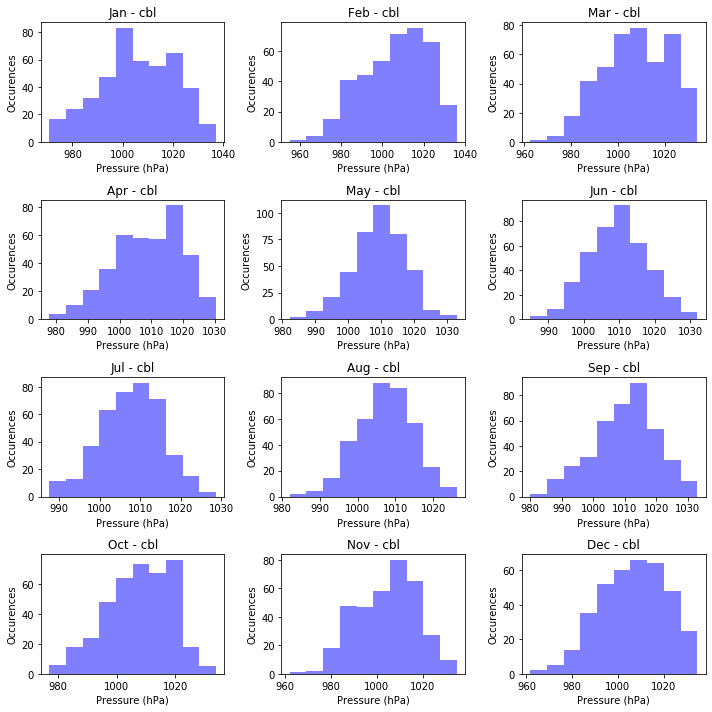

In [103]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['cbl'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Pressure (hPa)')
        ax.set_title(months[i] + " - cbl")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

Like for temperature, the data for some of the months looks like it might be Normally distributed, and for others it clearly isn't. Go through the same steps of the Shapiro-Wilks test, then creating simulated data using numpy.random and the KDE.

In [104]:
i=0
norm=[]
nonnorm=[]
for i in range(12):
    stat, p = shapiro(mx[i]['cbl'])
    alpha = 0.05
    if p > alpha:
        print(months[i], " 'cbl' - sample looks Normal")
        norm.append(i)
    else:
        print(months[i], " 'cbl' - sample does not look Normal")
        nonnorm.append(i)
    i+=1 

Jan  'cbl' - sample does not look Normal
Feb  'cbl' - sample does not look Normal
Mar  'cbl' - sample does not look Normal
Apr  'cbl' - sample does not look Normal
May  'cbl' - sample looks Normal
Jun  'cbl' - sample looks Normal
Jul  'cbl' - sample looks Normal
Aug  'cbl' - sample looks Normal
Sep  'cbl' - sample does not look Normal
Oct  'cbl' - sample does not look Normal
Nov  'cbl' - sample does not look Normal
Dec  'cbl' - sample does not look Normal


Generate the non-Normal simulated data:

In [105]:
sim_cbl=[0]*12
for i in nonnorm:
   num=len(mx[i]['cbl'])
   actual_values = mx[i]['cbl']
   sample_pdf = scipy.stats.gaussian_kde(actual_values)
   sim_cbl[i] = sample_pdf.resample(num).T[:,0]

Now generate the Normal simulated data

In [106]:
for i in norm:
   mean=(mx[i]['cbl'].mean())
   std =(mx[i]['cbl'].std())
   num=len(mx[i]['cbl'])
   sim_cbl[i]=np.random.normal(mean,std,num)    

Check what the histograms look like for rainfall :

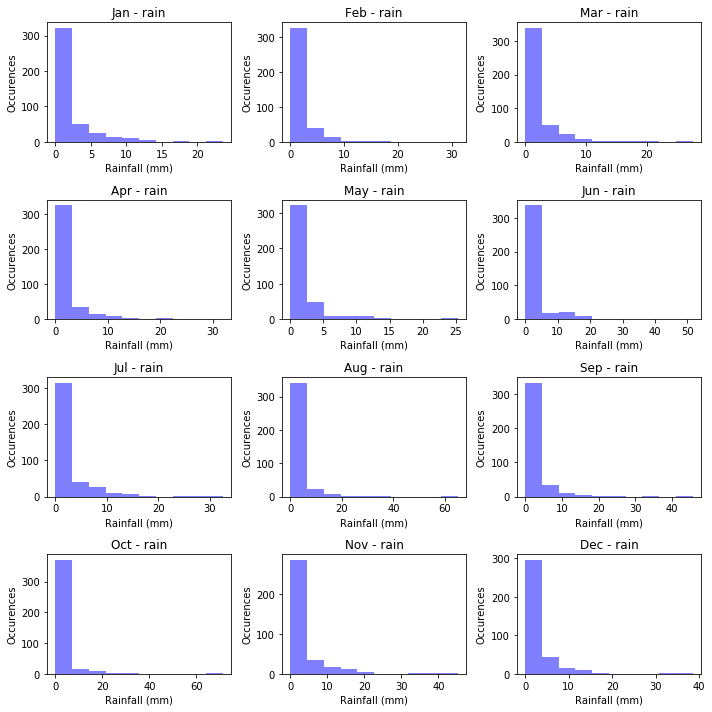

In [107]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(mx[i]['rain'], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Rainfall (mm)')
        ax.set_title(months[i] + " - rain")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()

This data is very clearly not Normally distributed, but as stated above, a team at Maynooth university found a Gamma probability distribution may be used to model rainfall.  

To use the numpy.random.gamma function to generate simulated data we need to calculate the parameters for it - shape and scale [19]. The shape is given by $\frac{mean^2}{variance}$, and the scale by 
$\frac{variance}{mean}$   

Calculate the mean, variance, then scale and shape for each month for 'rain', and create a simulated dataset using numpy.random.gamma

In [108]:
sim_rain=[]
for i in range(12):
   mean=(mx[i]['rain'].mean())
   var =(mx[i]['rain'].var())
   num=len(mx[i]['rain'])
   scale=(var/mean)
   shape=(mean*mean)/var
   sim_rain.append(np.random.gamma(shape,scale,num)) 

Check what the simulated data look like :

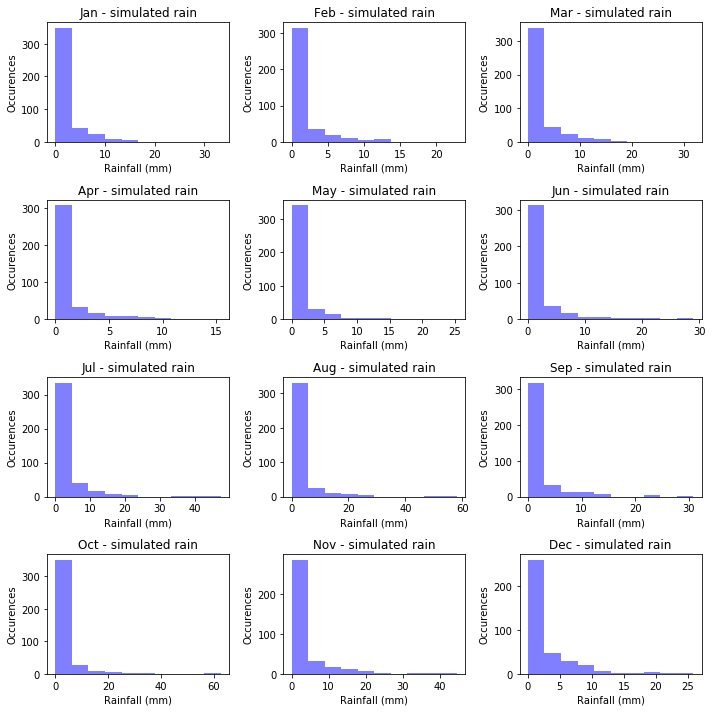

In [109]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
i = 0
for i1 in range(4):
    for i2 in range(3):
        ax = axes[i1][i2]
        ax.hist(sim_rain[i], bins=10, color='blue', alpha=0.5)
        ax.set_xlabel('Rainfall (mm)')
        ax.set_title(months[i] + " - simulated rain")
        ax.set_ylabel('Occurences')
        i+= 1

plt.tight_layout()
plt.show()    

These closely match the histograms for the actual data.  
Get a list of column names excluding the 'Date' column.

In [110]:
add=False
cols=[]
for col in df.columns:
    if add:
       cols.append(col)
    else:
       add=True
print(cols)  

['maxtp', 'mintp', 'rain', 'cbl']


Check if correlations exist between the variables, eg it would be unsurprising if days with lower minimum temperatures also had lower maximum temperatures. If this is the case we'll use the simulated values of one variable (eg maxtp) to rank the associated simulated values of variables that are correlated with it. We'll use Pearson's and Spearman's correlations to check for relationships between variables. A positive value for the correlation coefficient greater than 0.5 indicates a likely positive relationship, and a negative value of less than -0.5 indicates a likely negative relationship.  
Check each column pair, excluding date - we've effectively built in a dependency on date by separating out the data by month, as we know that the time of year definitely influences weather variables [20].

In [111]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Loop by column (variable type)
for ix in range(3):
# Loop through the other variables    
   for iy in range((3-ix)): 
# Loop through each month        
      for i in range(12):
         corr, _ = pearsonr(mx[i][cols[ix]], mx[i][cols[(ix+iy+1)]])
         if corr > 0.1 or corr < -0.1:
            print(months[i], cols[ix], cols[(ix+iy+1)], " Pearsons correlation : %.3f" % corr)
            
         corr, _ = spearmanr(mx[i][cols[ix]], mx[i][cols[(ix+iy+1)]])
         if corr > 0.1 or corr < -0.1:
            print(months[i], cols[ix], cols[(ix+iy+1)], " Spearmans correlation : %.3f" % corr) 
                 

Jan maxtp mintp  Pearsons correlation : 0.738
Jan maxtp mintp  Spearmans correlation : 0.715
Feb maxtp mintp  Pearsons correlation : 0.664
Feb maxtp mintp  Spearmans correlation : 0.667
Mar maxtp mintp  Pearsons correlation : 0.550
Mar maxtp mintp  Spearmans correlation : 0.575
Apr maxtp mintp  Pearsons correlation : 0.446
Apr maxtp mintp  Spearmans correlation : 0.411
May maxtp mintp  Pearsons correlation : 0.535
May maxtp mintp  Spearmans correlation : 0.517
Jun maxtp mintp  Pearsons correlation : 0.500
Jun maxtp mintp  Spearmans correlation : 0.499
Jul maxtp mintp  Pearsons correlation : 0.465
Jul maxtp mintp  Spearmans correlation : 0.465
Aug maxtp mintp  Pearsons correlation : 0.480
Aug maxtp mintp  Spearmans correlation : 0.463
Sep maxtp mintp  Pearsons correlation : 0.496
Sep maxtp mintp  Spearmans correlation : 0.441
Oct maxtp mintp  Pearsons correlation : 0.609
Oct maxtp mintp  Spearmans correlation : 0.568
Nov maxtp mintp  Pearsons correlation : 0.744
Nov maxtp mintp  Spearma

There's a strong positive correlation for Jan, Feb, Mar, May, Oct, Nov and Dec between max and min temperature, with a weak correlation for the other months, and a weak negative correlation between rainfall and pressure (cbl).  
For these two variable pairs check the correlation between the simulated data sets we've generated:

In [112]:
for i in range(12):
   corr, _ = pearsonr(sim_maxtp[i], sim_mintp[i])
   print(months[i], "maxtp mintp Pearsons correlation : %.3f" % corr)
   corr, _ = spearmanr(sim_maxtp[i], sim_mintp[i])
   print(months[i], "maxtp mintp Spearmans correlation : %.3f" % corr)

Jan maxtp mintp Pearsons correlation : 0.015
Jan maxtp mintp Spearmans correlation : 0.018
Feb maxtp mintp Pearsons correlation : 0.027
Feb maxtp mintp Spearmans correlation : 0.013
Mar maxtp mintp Pearsons correlation : 0.012
Mar maxtp mintp Spearmans correlation : 0.023
Apr maxtp mintp Pearsons correlation : 0.066
Apr maxtp mintp Spearmans correlation : 0.069
May maxtp mintp Pearsons correlation : -0.026
May maxtp mintp Spearmans correlation : -0.009
Jun maxtp mintp Pearsons correlation : 0.006
Jun maxtp mintp Spearmans correlation : 0.006
Jul maxtp mintp Pearsons correlation : -0.061
Jul maxtp mintp Spearmans correlation : -0.066
Aug maxtp mintp Pearsons correlation : -0.051
Aug maxtp mintp Spearmans correlation : -0.036
Sep maxtp mintp Pearsons correlation : -0.036
Sep maxtp mintp Spearmans correlation : -0.045
Oct maxtp mintp Pearsons correlation : 0.055
Oct maxtp mintp Spearmans correlation : 0.071
Nov maxtp mintp Pearsons correlation : -0.044
Nov maxtp mintp Spearmans correlatio

The above shows little correlation, so we'll order min temp according to max temp for these months, by ranking the values for both, and retaining the max temp order. Check the rain-cbl pair too:

In [113]:
for i in range(12):
   corr, _ = pearsonr(sim_rain[i], sim_cbl[i])
   print(months[i], "rain cbl Pearsons correlation : %.3f" % corr)
   corr, _ = spearmanr(sim_rain[i], sim_cbl[i])
   print(months[i], "rain cbl Spearmans correlation : %.3f" % corr)

Jan rain cbl Pearsons correlation : 0.003
Jan rain cbl Spearmans correlation : 0.025
Feb rain cbl Pearsons correlation : -0.041
Feb rain cbl Spearmans correlation : -0.031
Mar rain cbl Pearsons correlation : 0.084
Mar rain cbl Spearmans correlation : 0.078
Apr rain cbl Pearsons correlation : -0.046
Apr rain cbl Spearmans correlation : -0.002
May rain cbl Pearsons correlation : 0.037
May rain cbl Spearmans correlation : 0.052
Jun rain cbl Pearsons correlation : -0.074
Jun rain cbl Spearmans correlation : -0.081
Jul rain cbl Pearsons correlation : 0.009
Jul rain cbl Spearmans correlation : -0.022
Aug rain cbl Pearsons correlation : -0.007
Aug rain cbl Spearmans correlation : -0.058
Sep rain cbl Pearsons correlation : -0.003
Sep rain cbl Spearmans correlation : 0.073
Oct rain cbl Pearsons correlation : -0.028
Oct rain cbl Spearmans correlation : -0.075
Nov rain cbl Pearsons correlation : -0.017
Nov rain cbl Spearmans correlation : 0.008
Dec rain cbl Pearsons correlation : 0.003
Dec rain c

Again, there is little correlation between the two, so we'll apply an order to the simulated data here too.  

First maxtp mintp:  
We'll check the impact of applying order to one month, December, where there is a high correlation between 'maxtp' and 'mintp'.  
Get the average of the 2 correlation coefficients for the actual data, and subtract the average of the 2 coefficients for the simulated data, then rank the values in the simulated data for 'maxtp' and apply that rank to a proportion (according to the coefficient values) of a sorted version of the 'mintp' data [21], [22], [23]. The remaining 'mintp' simulated data will be left unranked. We'll display the coefficients for the actual data, the unprocessed simulated data and the processed simulated data. We'll check that this works for one month - December.  

In [114]:
# Save the current 'mintp' order
sim_save=sim_mintp[11]

# Display the correlation coefficients for the actual data and the, as yet, unsorted 'mintp'
corr1, _ = pearsonr(mx[11]['maxtp'], mx[11]['mintp'])
print("Pearsons correlation actual data: %.3f" % corr1)
corr2, _ = spearmanr(mx[11]['maxtp'], mx[11]['mintp'])
print("Spearmans correlation actual data : %.3f" % corr2)
print('-------------------------------')
corr3, _ = pearsonr(sim_maxtp[11], sim_mintp[11])
print("Pearsons correlation unsorted simulated data: %.3f" % corr3)
corr4, _ = spearmanr(sim_maxtp[11], sim_mintp[11])
print("Spearmans correlation unsorted simulated data: %.3f" % corr4)

# Get the mean of the correlation coefficients, and subtract the small value 
# for the current level of correlation
corr=(((corr1+corr2)/2)-((corr3+corr4)/2))

# Rank each value in the 'maxtp' column
l = np.array(sim_maxtp[11])
s = pd.Series(l)
ln=s.rank(method='dense')

# Set the number of 'mintp' values that we'll re-order, according to the coefficient values
num=len(sim_mintp[11])
num=int(num*corr)

# Get a sorted version of the 'mintp' data
sim_mintp_sorted=np.sort(sim_mintp[11])

# For the proportion of the 'mintp' data that we're sorting, pair each value with a value in 'maxtp' 
# that has the same rank
sim_mintp_new=[]
for i in range(num):
    lni=int(ln[i])
    val=sim_mintp_sorted[(lni-1)]
    sim_mintp_new.append(val)
    result = np.where(sim_save == val)
    sim_save = np.delete(sim_save, result[0][0])

# Add the remaining unsorted 'mintp' data to the sorted data
num=len(sim_save)
for i in range(num):
    sim_mintp_new.append(sim_save[i])    
    
# Display the correlation coefficient for the newly ordered 'mintp'
print('-------------------------------')    
corrx, _ = pearsonr(sim_maxtp[11], sim_mintp_new)
print("Pearsons correlation sorted simulated data: %.3f" % corrx)
corrx, _ = spearmanr(sim_maxtp[11], sim_mintp_new)
print("Spearmans correlation sorted simulated data: %.3f" % corrx)    

Pearsons correlation actual data: 0.801
Spearmans correlation actual data : 0.768
-------------------------------
Pearsons correlation unsorted simulated data: 0.025
Spearmans correlation unsorted simulated data: 0.007
-------------------------------
Pearsons correlation sorted simulated data: 0.729
Spearmans correlation sorted simulated data: 0.795


The newly ordered simulated data has a much closer correlation coefficient for 'maxtp'and 'mintp' to the actual data than the previously unsorted 'mintp' Apply this to all the months:

In [115]:
# Loop through the months
for ix in range(12):
   sim_save=sim_mintp[ix]
   corr1, _ = pearsonr(mx[ix]['maxtp'], mx[ix]['mintp'])
   corr2, _ = spearmanr(mx[ix]['maxtp'], mx[ix]['mintp'])
   corr3, _ = pearsonr(sim_maxtp[ix], sim_mintp[ix])
   corr4, _ = spearmanr(sim_maxtp[ix], sim_mintp[ix])
# Get the average correlation for both tests
   corr=(((corr1+corr2)/2)-((corr3+corr4)/2))
# Rank the 'maxtp' values
   l = np.array(sim_maxtp[ix])
   s = pd.Series(l)
   ln=s.rank(method='dense')
# Sort the mintp values, then order a proportion of them using the rank from 'maxtp'
   num=len(sim_mintp[ix])
   num=int(num*corr)
   sim_mintp_sorted=np.sort(sim_mintp[ix])
   sim_mintp_new[ix]=[]
   for i in range(num):
      lni=int(ln[i])
      val=sim_mintp_sorted[(lni-1)]
      sim_mintp_new[ix].append(val)
      result = np.where(sim_save == val)
      sim_save = np.delete(sim_save, result[0][0])

# Add on the unsorted 'mintp' values
   num=len(sim_save)
   for i in range(num):
      sim_mintp_new[ix].append(sim_save[i])  
# Display the correlation now
   print(months[ix], " - Pearsons correlation actual data: %.3f" % corr1)
   print(months[ix], " - Spearmans correlation actual data : %.3f" % corr2)
   corr3, _ = pearsonr(sim_maxtp[ix], sim_mintp_new[ix])
   corr4, _ = spearmanr(sim_maxtp[ix], sim_mintp_new[ix])    
   print(months[ix], " - Pearsons correlation sorted simulated data: %.3f" % corr3)
   print(months[ix], " - Spearmans correlation sorted simulated data: %.3f" % corr4)     

Jan  - Pearsons correlation actual data: 0.738
Jan  - Spearmans correlation actual data : 0.715
Jan  - Pearsons correlation sorted simulated data: 0.715
Jan  - Spearmans correlation sorted simulated data: 0.710
Feb  - Pearsons correlation actual data: 0.664
Feb  - Spearmans correlation actual data : 0.667
Feb  - Pearsons correlation sorted simulated data: 0.642
Feb  - Spearmans correlation sorted simulated data: 0.668
Mar  - Pearsons correlation actual data: 0.550
Mar  - Spearmans correlation actual data : 0.575
Mar  - Pearsons correlation sorted simulated data: 0.504
Mar  - Spearmans correlation sorted simulated data: 0.521
Apr  - Pearsons correlation actual data: 0.446
Apr  - Spearmans correlation actual data : 0.411
Apr  - Pearsons correlation sorted simulated data: 0.375
Apr  - Spearmans correlation sorted simulated data: 0.383
May  - Pearsons correlation actual data: 0.535
May  - Spearmans correlation actual data : 0.517
May  - Pearsons correlation sorted simulated data: 0.489
May

The correlation between 'maxtp' and 'mintp' for all months is now similar between the actual and simulated data.  

Apply the same sort of process to 'rain' and 'cbl', but this time pair a proportion of 'cbl' values with those of a different rank in 'rain' - we want a negative correlation.

In [116]:
# loop through the months
sim_cbl_new = [[] for i in range(12)]
for ix in range(12):
   sim_save=sim_cbl[ix]
   corr1, _ = pearsonr(mx[ix]['rain'], mx[ix]['cbl'])
   corr2, _ = spearmanr(mx[ix]['rain'], mx[ix]['cbl'])
# Get the average correlation. Multiply by -1 to get a positive value for calculating how many 'cbl' 
# values we'll order
   corr=(-1)*((corr1+corr2)/2)
# Rank the 'rain' values
   l = np.array(sim_rain[ix])
   s = pd.Series(l)
   ln=s.rank(method='dense')
   num=len(sim_cbl[ix])
# Order the 'cbl' values, then pair a proportion of them with 'rain' values of a different rank - 
# to give a negative correlation
   num2=int(num*corr)
   sim_cbl_sorted=np.sort(sim_cbl[ix])
   sim_cbl_new[ix]=[]
   for i in range(num2):
# This is where we specify the different rank    
      lni=num-int(ln[i])
      val=sim_cbl_sorted[(lni-1)]
      sim_cbl_new[ix].append(val)
      result = np.where(sim_save == val)
      sim_save = np.delete(sim_save, result[0][0])
# Add in the unsorted 'cbl' values
   num=len(sim_save)
   for i in range(num):
      sim_cbl_new[ix].append(sim_save[i])  

   print(months[ix], " - Pearsons correlation actual data: %.3f" % corr1)
   print(months[ix], " - Spearmans correlation actual data : %.3f" % corr2)
   corr3, _ = pearsonr(sim_rain[ix], sim_cbl_new[ix])
   corr4, _ = spearmanr(sim_rain[ix], sim_cbl_new[ix])    
   print(months[ix], " - Pearsons correlation sorted simulated data: %.3f" % corr3)
   print(months[ix], " - Spearmans correlation sorted simulated data: %.3f" % corr4)     

Jan  - Pearsons correlation actual data: -0.373
Jan  - Spearmans correlation actual data : -0.514
Jan  - Pearsons correlation sorted simulated data: -0.355
Jan  - Spearmans correlation sorted simulated data: -0.480
Feb  - Pearsons correlation actual data: -0.370
Feb  - Spearmans correlation actual data : -0.500
Feb  - Pearsons correlation sorted simulated data: -0.335
Feb  - Spearmans correlation sorted simulated data: -0.503
Mar  - Pearsons correlation actual data: -0.444
Mar  - Spearmans correlation actual data : -0.656
Mar  - Pearsons correlation sorted simulated data: -0.411
Mar  - Spearmans correlation sorted simulated data: -0.558
Apr  - Pearsons correlation actual data: -0.435
Apr  - Spearmans correlation actual data : -0.590
Apr  - Pearsons correlation sorted simulated data: -0.218
Apr  - Spearmans correlation sorted simulated data: -0.433
May  - Pearsons correlation actual data: -0.406
May  - Spearmans correlation actual data : -0.571
May  - Pearsons correlation sorted simulat

Over the time period covered by the actual data there is likely to be a trend of increasing or decreasing values for each variable. Calculate the mean value for each variable for each month by year. Plot the values for 'maxtp' to illustrate this, fit a regression line and find the slope (which equals the average rate of change per year for the mean of the variable). A correcting factor can then be applied to the simulated data using this value.  

In [117]:
# get the mean values for 'maxtp', by month, by year
my={}
i=0
ymeans=[]
labels=['Max Temp (C)','Min Temp (C)', 'Rainfall (mm)', 'Pressure (hPa)']
a1=np.array(years, dtype=float)
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['maxtp'].mean())
   ymeans.append(ymean)
   i+=1 

Get the slope of the regression line for 'maxtp' for each month, and calculate a correction factor 
to apply to the simulated data - the average change per year times the number of years from the midpoint of the data. Plot the 'maxtp' mean values for January to illustrate the values and best fit regression line. The first year and last year of the data are not complete, so we need to cater for months with no value [24], [25].

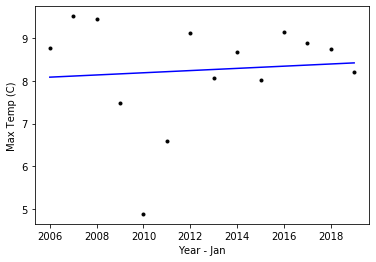

In [118]:
i=0
madds_maxtp=[]
slope_avg_max=0
#Loop through the months
for mon in months:
   a2=np.array(ymeans[i])
# Exclude months with no value
   idx = np.isfinite(a1) & np.isfinite(a2)
# Get the slope of the best fit line and multiply by the number of years from the mid-year of the
# actual data, to the year we're creating the data for
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   slope_avg_max=slope_avg_max+slope
   madds_maxtp.append(mfac*slope) 
# Produce a plot for January
   if i==0:
      intercept=par[0][1]
      plt.plot(a1, a2, 'k.')
      plt.plot(a1, (slope*a1)+intercept, 'b-')
      xlab='Year - '+months[i]
      plt.xlabel(xlab)
      plt.ylabel(labels[0])
      plt.show()
   i+=1
max_incr_2050=((slope_avg_max/12)*31)

There's an overall trend of rising temperatures, so we'll be adding to our simulated data to reflect this.  
Get the slope of the best fit lines for 'mintp', 'rain' and 'cbl':

In [119]:
# Get the slopes for 'mintp' by month
my={}
i=0
madds_mintp=[]
slope_avg_min=0
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['mintp'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   slope_avg_min=slope_avg_min+slope 
   madds_mintp.append(mfac*slope) 
   i+=1 

In [120]:
# Get the slopes for 'rain' by month
import math
my={}
i=0
slope_avg=0
madds_rain=[]

nu=0
rain_mean=0
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)]        
      ymean.append(my['rain'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   slope_avg=slope_avg+slope
   madds_rain.append(mfac*slope)    
   i+=1 

In [121]:
# Get the slopes for cbl by month
my={}
i=0
madds_cbl=[]
for mon in months:
   ymean=[]
   for y in yearx:
      my=mx[i][mx[i]['date'].str.contains(y)] 
      ymean.append(my['cbl'].mean())
   a2=np.array(ymean)
   idx = np.isfinite(a1) & np.isfinite(a2)
   par = np.polyfit(a1[idx], a2[idx], 1, full=True)
   slope=par[0][0]
   madds_cbl.append(mfac*slope) 
   i+=1 

For each variable, take a random selection from the simulated data we've generated for each month, according to the number of days in the month. Next, apply the correction factor calculated above based on the slope of the best fit line. For the 'rain' variable we need to ensure the correction factor doesn't leave us with negative values - if any are negative, set them to zero and subtract the amount from the nearest positive value(s) [26].

In [122]:
rxs=0
spx_maxtp=[]
spx_mintp=[]
spx_rain=[]
spx_cbl=[]
spx_maxtp_new=[]
spx_mintp_new=[]
spx_rain_new=[]
spx_cbl_new=[]
# Loop through each month
for i in range(12):
# Make a random selection from the current simulated data, according to the number of days in the
# month
    spx_maxtp.append(np.random.choice(sim_maxtp[i],ndays[i],replace=False)) 
    spx_mintp.append(np.random.choice(sim_mintp_new[i],ndays[i],replace=False))  
    spx_rain.append(np.random.choice(sim_rain[i],ndays[i],replace=False)) 
    spx_cbl.append(np.random.choice(sim_cbl_new[i],ndays[i],replace=False))  
# Apply the correction factor to each value, and round to one decimal place
    for num in range(len(spx_maxtp[i])):
        spx_maxtp_new.append(round(spx_maxtp[i][num] + madds_maxtp[i],1))
    for num in range(len(spx_mintp[i])):
        spx_mintp_new.append(round(spx_mintp[i][num] + madds_mintp[i]))
# Check for negative rain values after applying the correction factor. Keep a running total of deficit 
# in 'rxs', and set negative values to 0. Subtract the deficit from positive values.
    for num in range(len(spx_rain[i])):
        rx=spx_rain[i][num] + madds_rain[i]
        if rx < 0:
           rxs=rxs+rx
           rx=0
        else:
           if rx > 0 and rxs < 0:
              if (rx+rxs) < 0:
                 rxs=rxs+rx
                 rx=0
              else:
                 rx=rx+rxs
                 rxs=0
        spx_rain_new.append(round(rx))
    for num in range(len(spx_cbl[i])):
        spx_cbl_new.append(round(spx_cbl[i][num] + madds_cbl[i]))            

Check for 'maxtp' values paired with higher or equal 'mintp' values. If we find any switch the 'mintp' with another so that for both pairs the 'maxtp' is higher than the 'mintp'.

In [123]:
num=len(spx_maxtp_new)
# Loop through all the 'maxtp' 'mintp' pairs
for ixx in range(num):
    if spx_maxtp_new[ixx] <= spx_mintp_new[ixx]:
# 'maxtp' is <= 'mintp'
        iy=ixx+1
        if iy >= num:
            iy = 0
# Find a 'maxtp' 'mintp' pair to switch 'mintp' values, so that 'maxtp' for both is greater than 
# 'mintp'
        while ((spx_maxtp_new[ixx] <= spx_mintp_new[iy]) or (spx_maxtp_new[iy] <= spx_mintp_new[ixx])) and (iy != ixx):
            iy+=1
            if iy >= num:
                iy = 0
        if ixx != iy:           
            save=spx_mintp_new[ixx]
            spx_mintp_new[ixx] = spx_mintp_new[iy]
            spx_mintp_new[iy] = save

Combine the simulated data for date and each of the 4 variables into one dictionary [27].  

In [124]:
list_of_lists = [['Date']+odates,['Min Temp']+spx_mintp_new,['Max Temp']+spx_maxtp_new,['Rain']+spx_rain_new,['Cbl (Pressure)']+spx_cbl_new]
{z[0]:list(z[1:]) for z in zip(*list_of_lists)} 

{'Date': ['Min Temp', 'Max Temp', 'Rain', 'Cbl (Pressure)'],
 '01-Jan-20': [-2.0, 9.7, 1.0, 994.0],
 '02-Jan-20': [4.0, 10.8, 8.0, 989.0],
 '03-Jan-20': [1.0, 5.0, 0.0, 984.0],
 '04-Jan-20': [6.0, 8.7, 1.0, 997.0],
 '05-Jan-20': [2.0, 2.9, 1.0, 974.0],
 '06-Jan-20': [5.0, 7.2, 0.0, 990.0],
 '07-Jan-20': [3.0, 5.0, 1.0, 1018.0],
 '08-Jan-20': [2.0, 9.6, 0.0, 1026.0],
 '09-Jan-20': [2.0, 11.8, 1.0, 1028.0],
 '10-Jan-20': [-2.0, 11.1, 4.0, 1010.0],
 '11-Jan-20': [6.0, 6.2, 0.0, 993.0],
 '12-Jan-20': [7.0, 10.2, 8.0, 994.0],
 '13-Jan-20': [-3.0, 5.5, 3.0, 1008.0],
 '14-Jan-20': [3.0, 3.5, 13.0, 1027.0],
 '15-Jan-20': [1.0, 4.4, 2.0, 988.0],
 '16-Jan-20': [5.0, 15.2, 0.0, 995.0],
 '17-Jan-20': [1.0, 11.3, 1.0, 989.0],
 '18-Jan-20': [2.0, 10.4, 0.0, 987.0],
 '19-Jan-20': [5.0, 8.4, 1.0, 988.0],
 '20-Jan-20': [5.0, 14.6, 1.0, 1006.0],
 '21-Jan-20': [-0.0, 5.3, 0.0, 1000.0],
 '22-Jan-20': [-1.0, 8.3, 1.0, 1016.0],
 '23-Jan-20': [-1.0, 6.5, 6.0, 986.0],
 '24-Jan-20': [2.0, 8.6, 7.0, 1027.0],
 '

This simulated data is based on the actual readings over 13 years from the weather station. Sophisticated prediction models would take into account many factors, such as the trends in concentrations of a range of gasses in the atmosphere, likely changes in areas that contribute to gas emissions such as different industries, transport and domestic heating. Ocean temperatures and solar activity. There are potential events that could drastically impact on actual future values, such as major volcanic eruptions or asteroid strikes. Detailed studies of individual volcanoes/asteroids might help with predicting the impact of such events on weather, but it would require the use of very specific, intricate models.

Finally, check the annual rainfall and average temperature from our simulated data against that given by climate-data.org [28], which shows average annual rainfall of 767mm, and average temperature of 9.7C for Dublin. We'll take the average of the Min and Max temperature for each day, and the sum of the rainfall for each day.

In [125]:
print('Simulated data :')
print('Annual Rainfall - ', sum(spx_rain_new),("mm"))
minmax=(sum(spx_mintp_new)+sum(spx_maxtp_new))/730
print('Average annual temperature - ',round(minmax,2)," C")

Simulated data :
Annual Rainfall -  777.0 mm
Average annual temperature -  10.51  C


*References*  
1. https://data.gov.ie/dataset/phoenix-park-hourly-weather-station-data  
2. https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/    
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html   
4. https://en.wikipedia.org/wiki/Convective_planetary_boundary_layer
5. https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/      
6. https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe  
7. https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe  
8. https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe  
9. (ref https://stackoverflow.com/questions/733454/best-way-to-format-integer-as-string-with-leading-zeros)  
10. http://www.epa.ie/pubs/reports/research/climate/Reserach_Report_277.pdf   
11. https://stackoverflow.com/questions/47467077/python-plot-multiple-histograms   
12. https://matplotlib.org/users/tight_layout_guide.html  
13. https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python  
14. https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones- with-scipy-python)  
15. https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution)  
16. https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python  
17. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html  
18. https://www.geeksforgeeks.org/python-pandas-dataframe-mean  
19. https://stats.stackexchange.com/questions/280459/estimating-gamma-distribution-parameters-using-sample-mean-and-std)
20. https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables  
21. https://stackoverflow.com/questions/32655605/python-rank-a-list-of-number-string-convert-list-elements-to-ordinal-value  
22. https://thispointer.com/find-the-index-of-a-value-in-numpy-array   
23. https://thispointer.com/delete-elements-from-a-numpy-array-by-value-or-conditions-in-python  
24. https://stackoverflow.com/questions/28647172/numpy-polyfit-doesnt-handle-nan-values  
25. https://stackoverflow.com/questions/54603873/bokeh-plot-regression-lines-on-scatter-plot  
26. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html  
27. https://stackoverflow.com/questions/15834244/how-to-map-multiple-lists-to-one-dictionary  
28. https://en.climate-data.org/europe/ireland/dublin/dublin-6011

